# PyTorch Tutorial: How to develop DL models with Python by Jason Brownlee

### Moshe Wasserblat <br><br>March 2020

In [0]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
torch.manual_seed(7)

### Generate data 

In [0]:
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)



### Model Arch

In [0]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

### Init

In [0]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 10
running_loss = []

model = linearRegression(inputDim, outputDim)

### Define loss & optimizer

In [0]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Training:  1. Reset the gradients 2. Forward pass 3. Calc loss 4. Backward pass 5. One step of the optimizer

In [0]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    # for print loss vs. epoch
    running_loss.append(loss.item())

    print('epoch {}, loss {}'.format(epoch, round(loss.item(),5)))

tensor(258.3496, grad_fn=<MseLossBackward>)
epoch 0, loss 258.34958
tensor(21.4160, grad_fn=<MseLossBackward>)
epoch 1, loss 21.41602
tensor(2.0863, grad_fn=<MseLossBackward>)
epoch 2, loss 2.08626
tensor(0.5058, grad_fn=<MseLossBackward>)
epoch 3, loss 0.5058
tensor(0.3731, grad_fn=<MseLossBackward>)
epoch 4, loss 0.37314
tensor(0.3586, grad_fn=<MseLossBackward>)
epoch 5, loss 0.35861
tensor(0.3538, grad_fn=<MseLossBackward>)
epoch 6, loss 0.35377
tensor(0.3497, grad_fn=<MseLossBackward>)
epoch 7, loss 0.34975
tensor(0.3458, grad_fn=<MseLossBackward>)
epoch 8, loss 0.34583
tensor(0.3420, grad_fn=<MseLossBackward>)
epoch 9, loss 0.34197


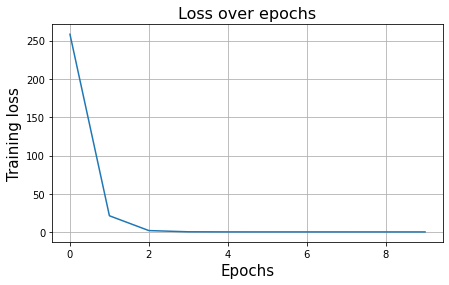

In [0]:
plt.figure(figsize=(7,4))
plt.title("Loss over epochs",fontsize=16)
plt.plot([e for e in range(epochs)],running_loss)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.show()

### Test

[[ 0.7976537]
 [ 2.8267868]
 [ 4.85592  ]
 [ 6.885053 ]
 [ 8.9141865]
 [10.943319 ]
 [12.972452 ]
 [15.001585 ]
 [17.030718 ]
 [19.05985  ]
 [21.088984 ]]


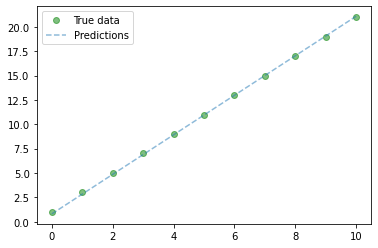

In [0]:
with torch.no_grad(): # we don't need gradients in the testing phase
  predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()